# Assignment 1 ([M4LP](https://osiris.uu.nl/osiris_student_uuprd/OnderwijsCatalogusSelect.do?selectie=cursus&collegejaar=2021&cursus=KI3V21001))

The assignment covers dependency and constituency parsing.  
<font color="red">**The rules to follow**:</font>  
* Don't delete any initially provided cells, either text or code cells (but you should delete certain lines in the cells, continue reading).
* Don't delete the exercise code header `#...# EXERCISE n #..#` lines and the `# TEST` lines. 
* Don't change the names of provided functions and variables. 
* If you skip an exercise, then delete all lines in the cell following the header `#...# EXERCISE n #..#` but leave its backup part--the line with `IFSKIPPED` and its following lines.
* If you solve an exercise, then delete its corresponding backup part starting with `IFSKIPPED` and the following lines. 
* Use global vars throughout your code and change only those globals vars that are explicitly instructed. 
* For `#TEST` cells, if its output is coming from your code, then leave it; otherwise clear the output of the cell as it is uninformative and clutters the ipynb. 
* For Text cells, you are expected to insert your input only in the cells that come with a red section title. 
* Name the ipynb file with your group number before submitting, e.g., `01.ipynb` or `11.ipynb`.

<font color="red">You following these rules helps us to grade the submissions relatively efficiently. If these rules are violated, a submission will be subject to penalty points.</font>  

<font color="red">**IMPORTANT**</font>: you are strongly encouraged to use Google Colab when solving the exercises. Setting the common environment prevents students and teachers from various headaches related to cross-platform variations, module/package versioning, and unpredicted behaviour of the code. In this way, we try that you spend as much time as possible on coding during the course rather than on installations. Moreover, colab notebooks are very practical for group collaboration as they come with version history and several persons can work on the same notebook (not simultaneously though).  
You are still free to solve the exercises on your own machine but in the end, make sure that your solutions also work in the colab environment. 

by L.abzianidze@uu.nl

# <font color="red">Contributions</font>

* Group 42
* Thijmen van der Meijden, Viggo de Breij, Lex Klaassen
* Everyone to every exercise

# Environment setup

## Installation

Import spaCy and download its model. Install Stanza that comes with an interface for CoreNLP. Download CoreNLP. Install modules and prepare the environment for rendering syntactic trees of NLTK. Download a course-specific python package that contains useful tools.  

Additionally, you might find the following predefined function(s) handy: [isinstance](https://www.programiz.com/python-programming/methods/built-in/isinstance), [list comprehension](https://www.programiz.com/python-programming/list-comprehension), [f-string](https://www.geeksforgeeks.org/formatted-string-literals-f-strings-python/)

In [1]:
import spacy
if spacy.__version__ != '3.5.2':
    print(f"spaCy v={spacy.__version__} but it should be 3.5.2\nForce install 3.5.2 with the next cell")

In [2]:


# may require environment restart
# !pip install spacy==3.5.2

# if this cell errors with "A UTF-8 locale is required. Got ANSI_X3.4-1968"
# uncomment and run the next two lines 
# import locale
# locale.getpreferredencoding = lambda: "UTF-8"

!python -m spacy download en_core_web_md

2023-05-05 09:39:36.171259: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 16.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [3]:
!pip install stanza

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.5/802.5 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 27.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=628bfb6832b8bf706f21edcfb045ba4ad5d195b60462494dcf19594eb734e529
  Stored in directory: /root/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built emoji


In [4]:
import stanza
if stanza.__version__ != '1.5.0':
    print(f"stanza v={stanza.__version__} but it should be 1.5.0\nForce install 1.5.0 with the next cell")

In [5]:
# may require environment restart
# !pip install stanza==1.5.0

In [6]:
import os
# Download the Stanford CoreNLP package with Stanza's installation command
# This'll take several minutes, depending on the network speed
corenlp_dir = './corenlp'
stanza.install_corenlp(dir=corenlp_dir)
# Set the CORENLP_HOME environment variable to point to the installation location
os.environ["CORENLP_HOME"] = corenlp_dir
# Import client module
from stanza.server import CoreNLPClient
# src: https://github.com/stanfordnlp/stanza/blob/main/demo/Stanza_CoreNLP_Interface.ipynb

INFO:stanza:Installing CoreNLP package into ./corenlp


In [7]:
# Needed to display NLTK's trees objects
!pip install svgling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 3.8 MB/s eta 0:00:00


In [8]:
# assigntools package is a course specific collection of useful tools 
! rm -rf assigntools
! git clone https://github.com/kovvalsky/assigntools.git

Cloning into 'assigntools'...
remote: Enumerating objects: 228, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 228 (delta 10), reused 0 (delta 0), pack-reused 200
Receiving objects: 100% (228/228), 55.48 KiB | 1.58 MiB/s, done.
Resolving deltas: 100% (112/112), done.


## Import

In [9]:
import pandas as pd
import numpy as np
import os, sys
import nltk
from nltk.tree import Tree
from IPython.display import display
from spacy import displacy
import importlib

In [10]:
# Course-specific package

from assigntools.M4LP.A1 import read_pickle, write_pickle, download_extract_zip, flatten_list, display_doc_dep

In [11]:
# TEST
print(f"spaCy version: {spacy.__version__}")    # should be 3.5.2
print(f"Python version: {sys.version}")
print(f"NLTK version: {nltk.__version__}")
print(f"stranza version: {stanza.__version__}") # should be 1.5.0

spaCy version: 3.5.2
Python version: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
NLTK version: 3.8.1
stranza version: 1.5.0


## Download

In [12]:
# read-only
# URL of a file that will be used during the assignmnet 
SICK_TRIAL_URL =  "http://alt.qcri.org/semeval2014/task1/data/uploads/sick_trial.zip"
files = download_extract_zip(SICK_TRIAL_URL)

## User modules

Import all modules here what you might need in addition to what is already imported.

In [ ]:
# IMPORT ALL ADDED AND NECESSARY MODULES HERE (IF ANY)


# Ex1[2pt]: Extracting sentences

Often when parsing a bunch of sentences, it is a good practice to parse each sentence only once and decrease the parsing time. The number of sentences in this exercises are not too much, so saved parsing time in the end will be ~2-3min, but sometimes in real applications such tricks can save hours. 

The file the function is supposed to read is tab-seperated-value file. You can use string operations or regex to read the sentences but the best practice is to use ready modules that provide file readers for common file formats.   

In [13]:
################################################################################
################################## EXERCISE 1 ##################################
################################################################################

def read_tsv_sents(file_path):
    """ Takes the path of a tab-seperated-value file and reads sentences from it.
        Return a list of sentences that is sorted (in ascending order) 
        and duplicate ones are filtered out.
    """
    sentences = set()
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            fields = line.strip().split('\t')
            if len(fields) >= 2:
                sentence_A = fields[1].strip()
                sentence_B = fields[2].strip()
                sentences.add(sentence_A)
                sentences.add(sentence_B)
    return sorted(list(sentences))

In [14]:
# TEST EX1
sents = read_tsv_sents('SICK_trial.txt')
assert sents[:3] == ['A baby is playing with a doll', 'A baby is playing with a toy', 'A baby tiger is playing with a ball']


# Ex2[2pt]:Parsing and tagging with spaCy

Now it is time to parse sentences. We will use [spaCy](https://spacy.io/) for getting dependency trees of the sentences. In addition to the dependency parsing, spaCy pipeline also does part-of-speech tagging and lemmatization (with other stuff). In this exercise, we print spaCy's token annotations in a style of a table. The fancy table is due to good integration of pandas Data Frames into Jupyter notebooks.   

For a quick intro to spaCy, have a look at the following section in the [spaCy tutorial](https://course.spacy.io/en/): sections 1 and 5 in [chapter 1](https://course.spacy.io/en/chapter1), and 4 in [chapter 2](https://course.spacy.io/en/chapter2).   
Use attributes of spaCy's [Token objects](https://spacy.io/api/token).  
[10min to pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html) is a good start to learn basics about pandas Data Frames.  
After annotation, tokens come with two pos tags: fine-grained corresponds to [Penn Treebank pos tags](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html) while coarse-grained to [Universal pos tags](https://universaldependencies.org/u/pos/).  

In [15]:
# parsing all sentences with spaCy's small model
nlp_sm = spacy.load("en_core_web_sm")
docs_sm = list(nlp_sm.pipe(sents))

In [16]:
# parsing all sentences with spaCy's medium model
nlp_md = spacy.load("en_core_web_md")
docs_md = list(nlp_md.pipe(sents))

In [17]:
################################################################################
################################## EXERCISE 2 ##################################
################################################################################

def doc_df_anno(doc):
    """ Structure spaCy annotations in a pandas DataFrame and return it.
    """
    indexa =[]
    data = []
    i = 0
    for token in doc:
        row = {
            
            "lemma": token.lemma_,
            "pos": token.pos_,
            "tag": token.tag_,
            "dep": token.dep_,
            "head_i": token.head.i,
            "head_text": token.head.text
        }
        indexa.append(f"{i}:{token.text}")
        i = i + 1
        data.append(row)
    
    df = pd.DataFrame(data, index=indexa)
    return df.T

In [19]:
# TEST
doc_df_anno(docs_md[0])

,0:A,1:baby,2:is,3:playing,4:with,5:a,6:doll
lemma,a,baby,be,play,with,a,doll
pos,DET,NOUN,AUX,VERB,ADP,DET,NOUN
tag,DT,NN,VBZ,VBG,IN,DT,NN
dep,det,nsubj,aux,ROOT,prep,det,pobj
head_i,1,3,3,3,3,6,4
head_text,baby,playing,playing,playing,playing,doll,with


In [20]:
# TEST EX2: There is a visually better way to display spaCy's dependency trees with the help of displaCy
display_doc_dep(docs_md[0])
# we can regulate space between tokens, but it might affect readability of labels
display_doc_dep(docs_md[1], d=100)

# Ex3[4pt]: Projectivity

Use spaCy's [Token attributes or methods](https://spacy.io/api/token) related to dependency annotations. This will make code much much simpler. 

In [21]:
################################################################################
################################## EXERCISE 3 ##################################
################################################################################

def is_projective(doc):
    """ Checks a dependency tree on projectivity. Uses the definition 
        of projective arcs and checks all arcs on projectivity.  
    """
    doclist = [t.text for t in doc]
    for token in doc:

      sub = [t.i for t in token.subtree]
      mini = min(sub)
      maxi = max(sub)
      if list(range(mini, maxi+1)) != sub:
        return False
    return True

In [22]:
# TEST
for i, d in enumerate(docs_sm):
    if not is_projective(d):
        print(f"{i}: {d}")

689: The girl has red hair and eyebrows, several piercings in a ear and a drawing on the back
690: The girl has red hair and eyebrows, several piercings in a ear and a tattoo on the back


In [23]:
# TEST
for i, d in enumerate(docs_md):
    if not is_projective(d):
        print(f"{i}: {d}")

52: A boy under an umbrella is being held by his father who is wearing a blue coat


In [24]:
# TEST EX3: Let's see how non-projective dependency trees look like
# using compat=False to better display crossing arcs 
display_doc_dep(docs_md[52], compact=False, d=100)

# Ex4[2pt]: Annotation-based filtering

Annotations provides additional info that can be used to filter data. Let's build a function that filters spaCy docs based on occurence on certain tags or lemmas. Use [Penn Treebank pos tags](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html) for filtering.  

In [25]:
################################################################################
################################## EXERCISE 4 ##################################
################################################################################

def filter_docs(docs, lemmas=[], tags=[], verbose=False):
    """ Filters out docs that contain no single token with a tag (i.e., .tag_)
        OR a lemma (i.e., .lemma_) in the provided lemmas and tags lists.
        Return the filtered docs (i.e., those that contain such a token).
        verbose flag determines whether to print a message about the number of
        returned docs.
        Note that the returned docs needs to contain lemmas OR tags: 
        parameters are interpreted as disjunction 
    """
    doclist = set()
    for doc in docs:
      for token in doc:
        if token.tag_ in tags or token.lemma_ in lemmas:
          doclist.add(doc)
          
    doclist = list(doclist)
    if verbose:
      print(f"{len(doclist)} docs contain tags ({tags}) or lemmas ({lemmas})")

In [26]:
# TEST EX4
_ = filter_docs(docs_sm, tags=["NNS"], lemmas=["dog", "cat"], verbose=True)
_ = filter_docs(docs_sm, tags=["VBD"], lemmas=["she"], verbose=True)

385 docs contain tags (['NNS']) or lemmas (['dog', 'cat'])
6 docs contain tags (['VBD']) or lemmas (['she'])


# Parsing with CoreNLP

CoreNLP will be used through [Stanza CoreNLP interface](https://github.com/stanfordnlp/stanza/blob/main/demo/Stanza_CoreNLP_Interface.ipynb). CoreNLP provides both constituency and dependency trees. For English, it is possible to directly get dependency trees with a dependency parser or indirectly obtain them by converting the constituency trees into dependecy trees. 

In [27]:
# Getting dependency trees from a dependency parser
# takes <1min
# https://stanfordnlp.github.io/CoreNLP/depparse.html
with CoreNLPClient(annotators='tokenize,pos,depparse', 
                   memory='4G', endpoint='http://localhost:9021', be_quiet=True,
                   output_format='json') as client:
    core_dep_parses = [ client.annotate(s)['sentences'][0] for s in sents ]

INFO:stanza:Writing properties to tmp file: corenlp_server-fb6086c25aea460c.props
INFO:stanza:Starting server with command: java -Xmx4G -cp ./corenlp/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9021 -timeout 60000 -threads 5 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-fb6086c25aea460c.props -annotators tokenize,pos,depparse -preload -outputFormat json


In [28]:
# Getting dependency trees from a constituency parser
# takes <2min
# https://stanfordnlp.github.io/CoreNLP/parse.html
with CoreNLPClient(annotators='tokenize,pos,parse', 
                   memory='4G', endpoint='http://localhost:9021', be_quiet=True,
                   output_format='json') as client:
    core_con_parses = [ client.annotate(s)['sentences'][0] for s in sents ]

INFO:stanza:Writing properties to tmp file: corenlp_server-da6f9e4cb4584230.props
INFO:stanza:Starting server with command: java -Xmx4G -cp ./corenlp/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9021 -timeout 60000 -threads 5 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-da6f9e4cb4584230.props -annotators tokenize,pos,parse -preload -outputFormat json


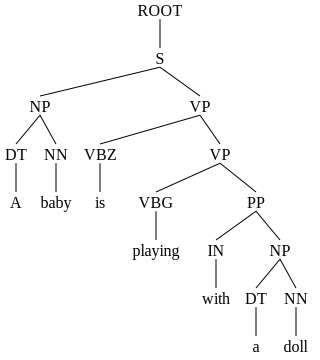

In [29]:
# TEST: Drawing CoreNLP constituency trees with NLTK's Tree object
Tree.fromstring(core_con_parses[0]['parse'])

# Ex5:[3pt] From CoreNLP to Doc

CoreNLP dependencies, e.g., `core_dep_parses[0]['basicDependencies']` are a list of dictionaries each corresponding to a token. It would be handy if the dependencies are formatted as spaCy's [Doc object](https://spacy.io/api/doc), which allows to display dependency trees (or check projectivity). Read how [Doc](https://spacy.io/api/doc) can be initialized. You should find `core_dep_parses[0]['tokens']` useful for getting values of `spaces` and `tags` arguments.   



In [30]:
################################################################################
################################## EXERCISE 5 ##################################
################################################################################

def coreNLP2Doc(parse, nlp):
    """ Uses info from parse['basicDependencies'] and parse['tokens'] 
        to initialize and return a Doc object.  
    """
    from spacy.tokens import Doc
    words = []
    spaces = []
    tags = []
    deps = []
    heads = []

    for token in parse['tokens']:
      if token['after'] == ' ':
        spaces.append(True)
      else:
        spaces.append(False)

      words.append(token['word'])
      tags.append(token['pos'])

    #Sort the basicDependencies on wordorder, so not root first
    sorted_deps = sorted(parse['basicDependencies'], key=lambda x: x['dependent'])
    for token in sorted_deps:
      deps.append(token['dep'])
      if token['governor'] == 0:
        heads.append(token['dependent'] - 1)
      else:
        heads.append(token['governor'] - 1)

    doc = Doc(nlp.vocab, words=words, spaces = spaces, tags = tags, deps = deps, heads = heads)
    return doc

In [31]:
# TEST
# coreNLP direct dependencies
d_dep = coreNLP2Doc(core_dep_parses[0], nlp_md)
display_doc_dep(d_dep, d=95, compact=False)
# coreNLP indirect dependencies
d_con = coreNLP2Doc(core_con_parses[0], nlp_md)
display_doc_dep(d_con, d=95, compact=False)

In [45]:
# Formatting CoreNLP dependecies as Doc objects
docs_dep = [ coreNLP2Doc(p, nlp_md) for p in core_dep_parses ]
docs_con = [ coreNLP2Doc(p, nlp_md) for p in core_con_parses ]

In [33]:
# TEST EX5: checking projectivity of dependencies induced from constituencies
for i, d in enumerate(docs_dep):
    if not is_projective(d):
        print(f"{i}: {d}")

# Ex6[4pt]: PP attachment

Correctly attaching prepositional phrases is a hard task in syntactic (and semantic) parsing. Now we will compare to what extent dependencies from small and medium models of spaCy differ from each other for the same sentences. We will compare how dependency trees attach prepositions to the heads (for simplicity we will ignore the dependency labels).

In [34]:
################################################################################
################################## EXERCISE 6 ##################################
################################################################################

def compare_pp_attachments(docs1, docs2, verbose=False):
    """ Takes two lists of dependencies (of the same length) and searches the indices of docs 
        for which the corresponding dependencies differ in attaching the prepositions 
        (i.e., heads of the preposition tokens are different).
        Prepositions are detecting with their tags. When docs1 and docs2 tag the same preposition
        differently, such cases are ignored in pp-attachment comparison. 
        Return a list of indices of differing docs (indexing starts from 0)
        When verbose is on, it reports and displays the corresponding contrasting dependencies
    """
    different_indices = []
    for i in range(len(docs1)):
        doc1 = docs1[i]
        doc2 = docs2[i]
        tokens1 = list(doc1)
        tokens2 = list(doc2)
        for j in range(len(tokens1)):
            token1 = tokens1[j]
            token2 = tokens2[j]
            if token1.dep_.startswith("prep") and token2.dep_.startswith("prep"):
                if token1.tag_ != token2.tag_:
                    continue
                if token1.head.text != token2.head.text:
                    different_indices.append(i)
                    if verbose:
                        print(f"Doc {i}:")
                        print(f"\t{token1} ({token1.head})")
                        print(f"\t{token2} ({token2.head})")
    return different_indices


In [37]:
# TEST
indices1 = compare_pp_attachments(docs_sm, docs_md)[:2]
print(f"First 2 Docs indices are having different pp-attachments:\n{indices1}")
print()
indices2 = compare_pp_attachments(docs_sm, docs_md)
print(f"All these Docs indices are having different pp-attachments:\n{indices2}")

First 2 Docs indices are having different pp-attachments:
[10, 13]

All these Docs indices are having different pp-attachments:
[10, 13, 19, 24, 78, 85, 95, 147, 153, 175, 177, 279, 287, 339, 365, 378, 419, 432, 447, 452, 514, 530, 560, 582, 612, 618, 669, 691, 716, 719, 726, 734, 742, 749, 815, 849, 868, 875, 876, 916]


In [38]:
# TEST EX6
compare_pp_attachments(docs_sm, docs_md, verbose=False)
# displayed images might be too wide, so use left & right arrow to scroll them horizontally  

[10,
 13,
 19,
 24,
 78,
 85,
 95,
 147,
 153,
 175,
 177,
 279,
 287,
 339,
 365,
 378,
 419,
 432,
 447,
 452,
 514,
 530,
 560,
 582,
 612,
 618,
 669,
 691,
 716,
 719,
 726,
 734,
 742,
 749,
 815,
 849,
 868,
 875,
 876,
 916]

# <font color="red">Ex7[4pt]: Contrasting PP-attachments</font>

1.   We chose firstly for sentence 339, this clearly displays the difference between the two conclusions of the models since it can mean both that the dog is holding a squirt gun and that the man is holding the squirt gun. The former being a lot less likely since a dog, generally, doesn't hold a squirt gun while a man has the capacity to possibly hold onto a squirt gun. Herein we find the conclusion, such being that we think that the medium model gives a more semantically tolerable conclusion.


2.   Our definition of the word 'perch': 'A fish.'
Secondly, our eyes were cast upon the wonderful sentence 669. This atrocity of an ambiguity had us dazzled with its potential meanings. First we figured the (un)logical possibility that the cat is looking to the outsides where this cats eyes got to feast upon a table, this table being situated on the perch. However, this seems highly unlikely since normally a table wouldn't be situated on a fish. But soon we conjured up the courage to accept that the meaning the medium model gave us was that the cat was looking on the perch, while inside, looking out of the window, while the cat was sitting on a table and the medium model thus being the most likely.







In [39]:
################################## EXERCISE 7 ##################################
display_doc_dep(docs_sm[339], d=95, compact=False)
display_doc_dep(docs_md[339], d=95, compact=False)

display_doc_dep(docs_sm[669], d=95, compact=False)
display_doc_dep(docs_md[669], d=95, compact=False)

# Ex8[5pt]: From dependency to list constituency

Syntactic trees are usually recursive structures, and so is dependency trees. This means that a dependency tree can be seen as a root node having arcs to the roots of sub-dependency trees. Processing recursive strcutures often requires recursive functions. Usually recursive functions are concise but writing them might not be easy if one is not familiar with recursive procedures. So, we would like you to practice writing recursive functions to process recursive structures. While doing this, we will still be using syntactic trees.

Write a function that converts spaCy's dependencies into lists of lists (with unbounded depth) of strings, where strings are token texts. We will call this structure list constituency (in short "lc") because list brackets naturally express constituency info. Use might find attributes/methods/properties of spaCy's [Token objects](https://spacy.io/api/token) very useful.

Non-projective dependencies are not convertible into a list constituency (think yourself why). For the exercise, it doesn't matter what happens to non-projective dependencies (and anyway they are few). Both are ok whether `dep2lc` errors on non-projective dependencies or provides a wrong list constituency.



In [42]:
################################################################################
################################## EXERCISE 8 ##################################
################################################################################
def dep2lc(doc):
    """ Takes spaCy's doc that comes with dependency annotation and converts
        it into constituency tree where constituents are represented as lists.
        Nested constituencies are automatically expressed as nested lists.
        This is a recursive function that should call itself in its body.
    """
    def dep2lc_rec(root):
        #Base case
        if len(list(root.children)) == 0: 
            return root.text
            
        #Recursion step
        childs = []
        for child in root.children:
            result = dep2lc_rec(child)
            childs.append(result)
        return childs + [root.text]

    #Find the root
    for token in list(doc):
        if token.head not in list(doc) or token.head.text == token.text:
            root = token
    return dep2lc_rec(root)

In [43]:
# TEST
print(dep2lc(docs_sm[37]))
print(dep2lc(docs_md[37]))
print(dep2lc(docs_dep[37]))
print(dep2lc(docs_con[37]))

[['A', 'boat'], 'is', 'peacefully', [['the', 'water'], 'over'], 'sailing']
[['A', 'boat'], 'is', 'peacefully', [['the', 'water'], 'over'], 'sailing']
[['A', 'boat'], 'is', 'peacefully', ['over', 'the', 'water'], 'sailing']
[['A', 'boat'], 'is', 'peacefully', ['over', 'the', 'water'], 'sailing']


In [44]:
# TEST EX8: note that list constituency is also a recursive struicture.
# Here is an example how a recursive function that flatterns it.
# You can find the body of the function in its git repo (see how flatten_list is imported).
flatten_list(dep2lc(docs_sm[37]))

['A', 'boat', 'is', 'peacefully', 'the', 'water', 'over', 'sailing']

# Ex9[4pt]: From phrase structures to list constituency

Now we are converting [NLTK's Tree object](https://www.nltk.org/howto/tree.html), which encodes phrase structures trees, into a list constituency. As in Ex9, it is easiest to process a recursive structure with a recursive function. You are provided with a ready function `corenlp2lc` that takes care of converting CoreNLP parses into NLTK's Trees and it employs `tree2lc` that you need to implement.

In [40]:
################################################################################
################################## EXERCISE 9 #################################
################################################################################

def tree2lc(tree):
    """ Takes NLTK's Tree object which encodes a phrase structure tree and
        converts it into a list representation of constituency (as in Ex9).
        Nested constituencies are automatically expressed as nested lists.
        This is a recursive function that should call itself in its body.
    """
    constituentlijst = []
    for child in tree:
      if len(child) != 1:
        constituentlijst.append(tree2lc(child))
      else:
        constituentlijst.append(''.join(child.leaves()))
    return constituentlijst

def corenlp2lc(analysis):
    """ A wrapper function for converting phrase structures to list constituency.
        The wrapper takes care of converting CoreNLP's 
        phrase structure trees into NLTK's Tree objects
    """
    tree = Tree.fromstring(analysis['parse'])
    return tree2lc(tree)
print(corenlp2lc(core_con_parses[37]))


[[['A', 'boat'], ['is', ['sailing', 'peacefully', ['over', ['the', 'water']]]]]]


In [41]:
# TEST EX9
corenlp2lc(core_con_parses[37])

[[['A', 'boat'],
  ['is', ['sailing', 'peacefully', ['over', ['the', 'water']]]]]]